In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt 
from math import ceil
from math import log

import numpy as np
from numpy.random import multivariate_normal, randn, uniform

import torch

from scipy.linalg import toeplitz
from scipy.linalg import norm
from scipy.linalg import svdvals
from scipy.linalg import qr
from scipy.optimize import fmin_l_bfgs_b

from algoritms.gradient_descent import sgd
from problems.regression import RegPb
from problems.over_parameterized_regression import OverParamRegPb
from problems.matric_factorization import MatFactPb
from utils.utils import visualize

# Exercice 1

In [2]:
# Problem variables
np.random.seed(0)
n = 100
X = np.random.normal(0, 1, n).reshape(n, 1)
y = np.random.normal(0, 1, n).reshape(n, 1)

### Question 1.a.

### Question 1.b.

k: 0 | loss: 8.23e-01 | lr: 1.00e-01
k: 1 | loss: 7.83e-01 | lr: 7.07e-02
k: 2 | loss: 7.54e-01 | lr: 5.77e-02
k: 3 | loss: 7.32e-01 | lr: 5.00e-02
k: 4 | loss: 7.14e-01 | lr: 4.47e-02
k: 5 | loss: 6.99e-01 | lr: 4.08e-02
k: 6 | loss: 6.87e-01 | lr: 3.78e-02
k: 7 | loss: 6.76e-01 | lr: 3.54e-02
k: 8 | loss: 6.66e-01 | lr: 3.33e-02
k: 9 | loss: 6.57e-01 | lr: 3.16e-02
k: 10 | loss: 6.50e-01 | lr: 3.02e-02
k: 11 | loss: 6.43e-01 | lr: 2.89e-02
k: 12 | loss: 6.37e-01 | lr: 2.77e-02
k: 13 | loss: 6.31e-01 | lr: 2.67e-02
k: 14 | loss: 6.26e-01 | lr: 2.58e-02
k: 15 | loss: 6.21e-01 | lr: 2.50e-02
k: 16 | loss: 6.17e-01 | lr: 2.43e-02
k: 17 | loss: 6.13e-01 | lr: 2.36e-02
k: 18 | loss: 6.09e-01 | lr: 2.29e-02
k: 19 | loss: 6.05e-01 | lr: 2.24e-02
k: 20 | loss: 6.02e-01 | lr: 2.18e-02
k: 21 | loss: 5.99e-01 | lr: 2.13e-02
k: 22 | loss: 5.96e-01 | lr: 2.09e-02
k: 23 | loss: 5.94e-01 | lr: 2.04e-02
k: 24 | loss: 5.91e-01 | lr: 2.00e-02
k: 25 | loss: 5.89e-01 | lr: 1.96e-02
k: 26 | loss: 5.86e-01

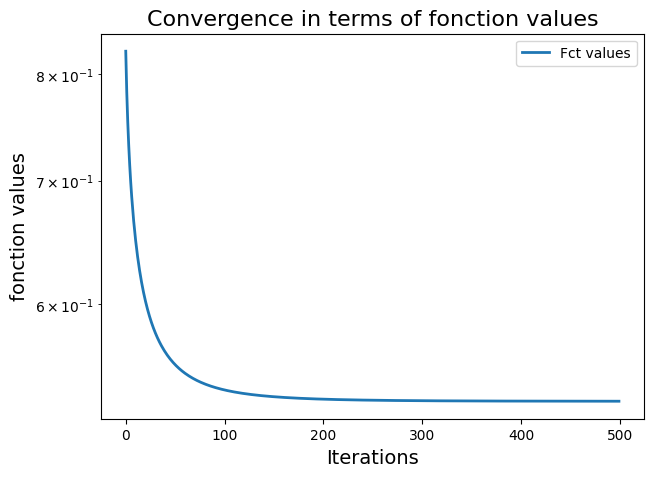

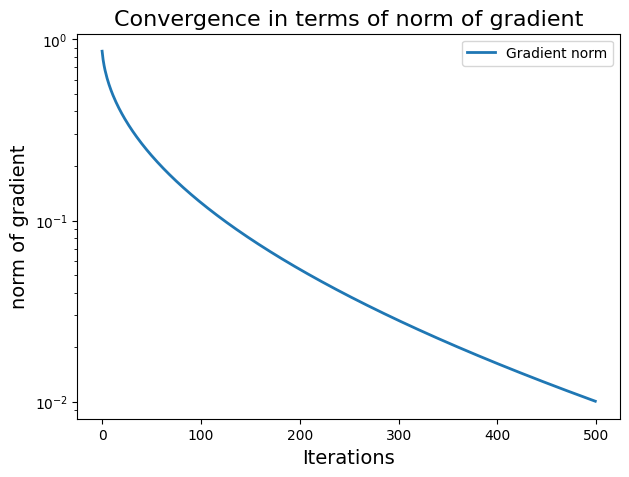

In [3]:
# Problem initialization
w0 = np.random.rand(1).reshape(1, 1)
pblinreg = RegPb(X=X, y=y, w=w0, lambda_reg=0)
n = batch_size = pblinreg.n

# Gradient Descent (batch_size = n)
loss_vals = sgd(
    pblinreg,
    stepchoice=0.5,
    init_step=0.1,
    batch_size=n,
    n_iter=500,
    verbose=True,
)
visualize(data={"Fct values": loss_vals}, subject="fonction values")
visualize(data={"Gradient norm": pblinreg.g_norm_list}, subject="norm of gradient")

### Question 2.a.

### Question 2.b.

k: 0 | loss: 1.82e-02 | lr: 1.00e+00
k: 1 | loss: 1.41e-03 | lr: 7.07e-01
k: 2 | loss: 2.39e-04 | lr: 5.77e-01
k: 3 | loss: 5.76e-05 | lr: 5.00e-01
k: 4 | loss: 1.70e-05 | lr: 4.47e-01
k: 5 | loss: 5.81e-06 | lr: 4.08e-01
k: 6 | loss: 2.20e-06 | lr: 3.78e-01
k: 7 | loss: 8.98e-07 | lr: 3.54e-01
k: 8 | loss: 3.91e-07 | lr: 3.33e-01
k: 9 | loss: 1.80e-07 | lr: 3.16e-01
k: 10 | loss: 8.62e-08 | lr: 3.02e-01
k: 11 | loss: 4.29e-08 | lr: 2.89e-01
k: 12 | loss: 2.21e-08 | lr: 2.77e-01
k: 13 | loss: 1.17e-08 | lr: 2.67e-01
k: 14 | loss: 6.35e-09 | lr: 2.58e-01
k: 15 | loss: 3.53e-09 | lr: 2.50e-01
k: 16 | loss: 2.00e-09 | lr: 2.43e-01
k: 17 | loss: 1.15e-09 | lr: 2.36e-01
k: 18 | loss: 6.77e-10 | lr: 2.29e-01
k: 19 | loss: 4.03e-10 | lr: 2.24e-01
k: 20 | loss: 2.44e-10 | lr: 2.18e-01
k: 21 | loss: 1.49e-10 | lr: 2.13e-01
k: 22 | loss: 9.26e-11 | lr: 2.09e-01
k: 23 | loss: 5.81e-11 | lr: 2.04e-01
k: 24 | loss: 3.68e-11 | lr: 2.00e-01
k: 25 | loss: 2.36e-11 | lr: 1.96e-01
k: 26 | loss: 1.52e-11

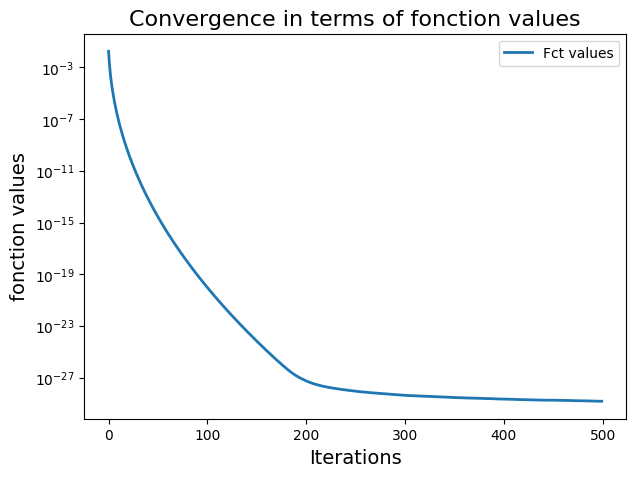

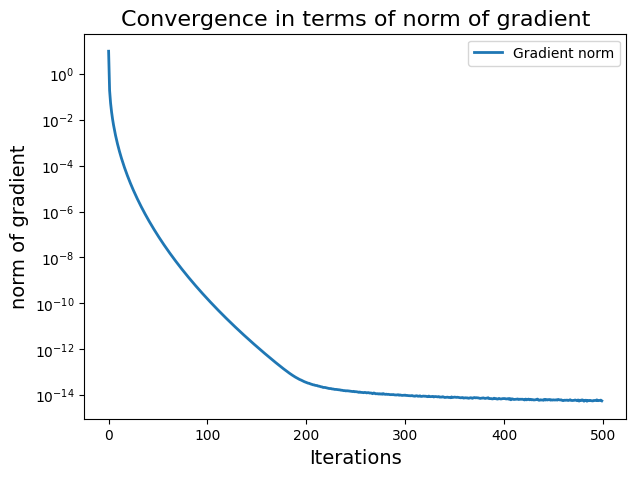

In [6]:
W0 = np.random.normal(0, 1, (n, n))
pblinreg = OverParamRegPb(X=X, y=y, W=W0, lambda_reg=0)

# Gradient Descent (batch_size = n)
loss_vals = sgd(
    pblinreg,
    stepchoice=0.5,
    init_step=1,
    batch_size=int(n),
    # batch_size=int(n / 2),
    n_iter=500,
    verbose=True,
)
visualize(data={"Fct values": loss_vals}, subject="fonction values")
visualize(data={"Gradient norm": pblinreg.W_grad_norm_list}, subject="norm of gradient")

# Exercice 2

In [45]:
# Set up
np.random.seed(0)
n1 = 10
n2 = 20
r = 1

# Instantiate target
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
X = x.dot(z.T)

# Instantiate parameters
U = np.random.normal(0, 1, (n1, r))
V = np.random.normal(0, 1, (n2, r))

In [46]:
gd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
n = gd_pbmatfact.n

# # Gradient Descent (batch_size = n)
# gd_loss_vals = sgd(
#     gd_pbmatfact,
#     stepchoice=0.25,
#     init_step=1,
#     batch_size=n,
#     n_iter=3000,
#     verbose=False,
# )

# Basic Stochastic Gradient Descent (batch_size = 1)
sgd_loss_vals = sgd(
    sgd_pbmatfact,
    stepchoice=0.25,
    init_step=1,
    batch_size=1,
    n_iter=3000,
    verbose=False,
)

# # Visualize Loss
# visualize(
#     data={"GD (batch = n) loss": gd_loss_vals, "SGD (batch = 1) loss": sgd_loss_vals},
#     subject="loss",
# )

# Visualize Average Gradients norm
visualize(
    data={
        "GD (batch = n) avg grad norm": gd_pbmatfact.avg_grad_norm_list,
        "SGD (batch = 1) avg grad norm": sgd_pbmatfact.avg_grad_norm_list,
    },
    subject="average of gradients norms",
    window_size=50,
)

ValueError: v cannot be empty

<Figure size 700x500 with 0 Axes>

In [ ]:
sgd0_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd025_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd05_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd075_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
gd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)

n = sgd0_pbmatfact.n

# Basic Stochastic Gradient Descent (batch_size = 1)
# sgd0_loss_vals = sgd(
#     sgd0_pbmatfact,
#     stepchoice=0.25,
#     batch_size=1,
#     n_iter=3000,
# )

# Stochastic Gradient Descent (batch_size = n/4)
sgd025_loss_vals = sgd(
    sgd025_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n / 4),
    n_iter=3000,
)
# Stochastic Gradient Descent (batch_size = n/2)
sgd05_loss_vals = sgd(
    sgd05_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n / 2),
    n_iter=3000,
)
# Stochastic Gradient Descent (batch_size = 3/4)
sgd075_loss_vals = sgd(
    sgd075_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n * (3 / 4)),
    n_iter=3000,
)
# Gradient Descent (batch_size = n)
gd_loss_vals = sgd(
    gd_pbmatfact,
    stepchoice=0.25,
    batch_size=n,
    n_iter=3000,
)

# Visualize Loss
visualize(
    data={
        # "SGD (batch = 1) loss": sgd0_loss_vals,
        "SGD (batch = n/4) loss": sgd025_loss_vals,
        "SGD (batch = n/2) loss": sgd05_loss_vals,
        "SGD (batch = n * 3/4) loss": sgd075_loss_vals,
        "GD (batch = n) loss": gd_loss_vals,
    },
    subject="loss",
)

RuntimeError: The size of tensor a (10) must match the size of tensor b (2) at non-singleton dimension 0

## Question 3.a.

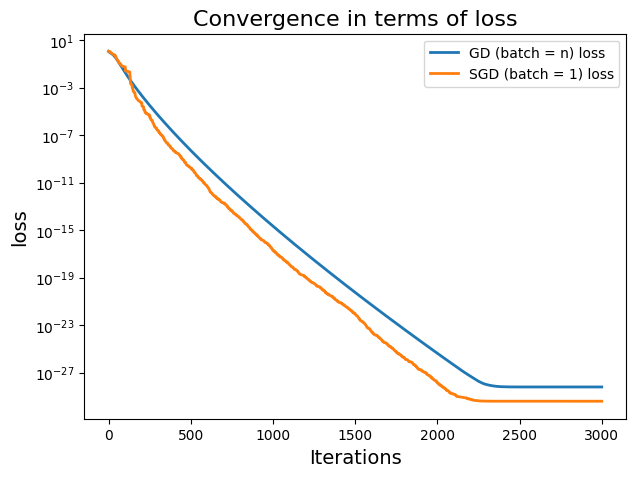

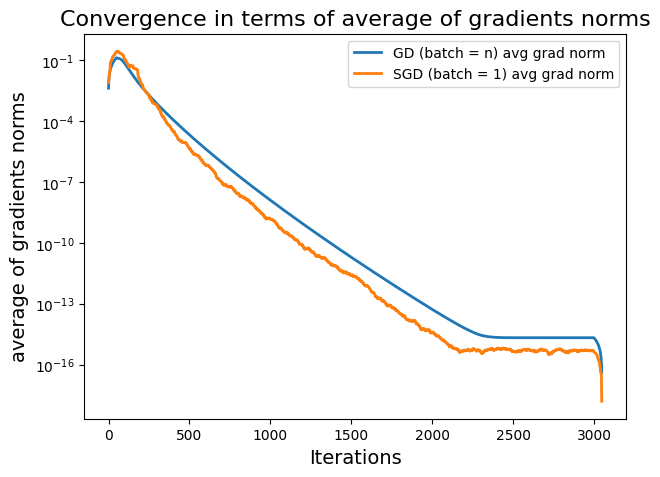

In [14]:
gd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
n = gd_pbmatfact.n

# Gradient Descent (batch_size = n)
gd_loss_vals = sgd(
    gd_pbmatfact,
    stepchoice=0.25,
    init_step=1,
    batch_size=n,
    n_iter=3000,
    verbose=False,
)

# Basic Stochastic Gradient Descent (batch_size = 1)
sgd_loss_vals = sgd(
    sgd_pbmatfact,
    stepchoice=0.25,
    init_step=1,
    batch_size=1,
    n_iter=3000,
    verbose=False,
)

# Visualize Loss
visualize(
    data={"GD (batch = n) loss": gd_loss_vals, "SGD (batch = 1) loss": sgd_loss_vals},
    subject="loss",
)

# Visualize Average Gradients norm
visualize(
    data={
        "GD (batch = n) avg grad norm": gd_pbmatfact.avg_grad_norm_list,
        "SGD (batch = 1) avg grad norm": sgd_pbmatfact.avg_grad_norm_list,
    },
    subject="average of gradients norms",
    window_size=50,
)

## Question 3.b.

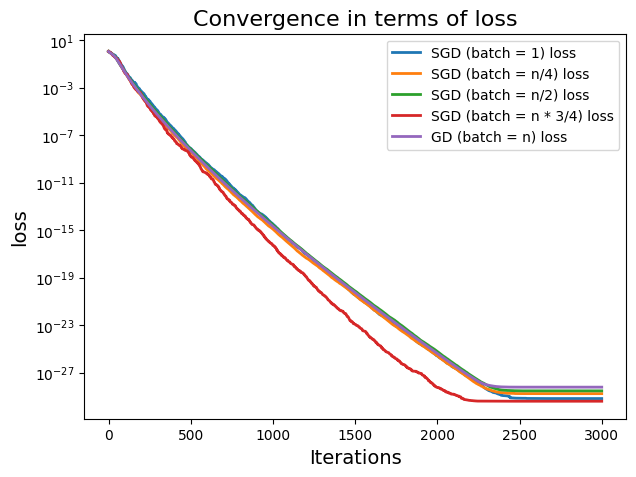

In [15]:
sgd0_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd025_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd05_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd075_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
gd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)

n = sgd0_pbmatfact.n

# Gradient Descent (batch_size = n)
sgd0_loss_vals = sgd(
    sgd0_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n / 4),
    n_iter=3000,
)

# Basic Stochastic Gradient Descent (batch_size = 1)
sgd025_loss_vals = sgd(
    sgd025_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n / 2),
    n_iter=3000,
)
# Basic Stochastic Gradient Descent (batch_size = 1)
sgd05_loss_vals = sgd(
    sgd05_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n * (3 / 4)),
    n_iter=3000,
)
# Basic Stochastic Gradient Descent (batch_size = 1)
sgd075_loss_vals = sgd(
    sgd075_pbmatfact,
    stepchoice=0.25,
    batch_size=1,
    n_iter=3000,
)
# Basic Stochastic Gradient Descent (batch_size = 1)
gd_loss_vals = sgd(
    gd_pbmatfact,
    stepchoice=0.25,
    batch_size=n,
    n_iter=3000,
)

# Visualize Loss
visualize(
    data={
        "SGD (batch = 1) loss": sgd0_loss_vals,
        "SGD (batch = n/4) loss": sgd025_loss_vals,
        "SGD (batch = n/2) loss": sgd05_loss_vals,
        "SGD (batch = n * 3/4) loss": sgd075_loss_vals,
        "GD (batch = n) loss": gd_loss_vals,
    },
    subject="loss",
)

## Question 4.b.

In [33]:
# Set up
np.random.seed(0)
n1 = 10
n2 = 20
r = 5

# Instantiate target
x = np.random.normal(0, 1, (n1, r))
z = np.random.normal(0, 1, (n2, r))
X = x.dot(z.T)

# Instantiate parameters
U = np.random.normal(0, 1, (n1, r))
V = np.random.normal(0, 1, (n2, r))

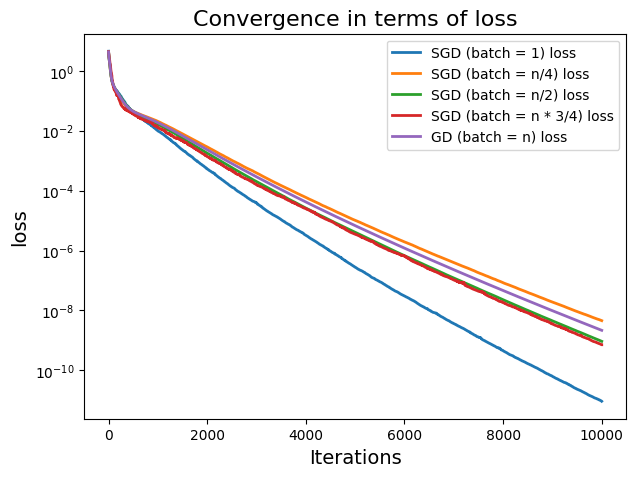

In [34]:
sgd0_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd025_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd05_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
sgd075_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
gd_pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)

n = sgd0_pbmatfact.n
n_iter = 10000

# Gradient Descent (batch_size = n)
sgd0_loss_vals = sgd(
    sgd0_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n / 4),
    n_iter=n_iter,
)

# Basic Stochastic Gradient Descent (batch_size = 1)
sgd025_loss_vals = sgd(
    sgd025_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n / 2),
    n_iter=n_iter,
)
# Basic Stochastic Gradient Descent (batch_size = 1)
sgd05_loss_vals = sgd(
    sgd05_pbmatfact,
    stepchoice=0.25,
    batch_size=int(n * (3 / 4)),
    n_iter=n_iter,
)
# Basic Stochastic Gradient Descent (batch_size = 1)
sgd075_loss_vals = sgd(
    sgd075_pbmatfact,
    stepchoice=0.25,
    batch_size=1,
    n_iter=n_iter,
)
# Basic Stochastic Gradient Descent (batch_size = 1)
gd_loss_vals = sgd(
    gd_pbmatfact,
    stepchoice=0.25,
    batch_size=n,
    n_iter=n_iter,
)

# Visualize Loss
visualize(
    data={
        "SGD (batch = 1) loss": sgd0_loss_vals,
        "SGD (batch = n/4) loss": sgd025_loss_vals,
        "SGD (batch = n/2) loss": sgd05_loss_vals,
        "SGD (batch = n * 3/4) loss": sgd075_loss_vals,
        "GD (batch = n) loss": gd_loss_vals,
    },
    subject="loss",
)

# Sandbox

k: 0 | loss: 8.88e-01 | lr: 1.00e+00
k: 1 | loss: 7.51e-01 | lr: 7.94e-01
k: 2 | loss: 6.76e-01 | lr: 6.93e-01
k: 3 | loss: 6.28e-01 | lr: 6.30e-01
k: 4 | loss: 5.94e-01 | lr: 5.85e-01
k: 5 | loss: 5.70e-01 | lr: 5.50e-01
k: 6 | loss: 5.51e-01 | lr: 5.23e-01
k: 7 | loss: 5.36e-01 | lr: 5.00e-01
k: 8 | loss: 5.24e-01 | lr: 4.81e-01
k: 9 | loss: 5.14e-01 | lr: 4.64e-01
k: 10 | loss: 5.05e-01 | lr: 4.50e-01
k: 11 | loss: 4.98e-01 | lr: 4.37e-01
k: 12 | loss: 4.92e-01 | lr: 4.25e-01
k: 13 | loss: 4.87e-01 | lr: 4.15e-01
k: 14 | loss: 4.82e-01 | lr: 4.05e-01
k: 15 | loss: 4.78e-01 | lr: 3.97e-01
k: 16 | loss: 4.74e-01 | lr: 3.89e-01
k: 17 | loss: 4.71e-01 | lr: 3.82e-01
k: 18 | loss: 4.68e-01 | lr: 3.75e-01
k: 19 | loss: 4.65e-01 | lr: 3.68e-01
k: 20 | loss: 4.63e-01 | lr: 3.62e-01
k: 21 | loss: 4.61e-01 | lr: 3.57e-01
k: 22 | loss: 4.59e-01 | lr: 3.52e-01
k: 23 | loss: 4.57e-01 | lr: 3.47e-01
k: 24 | loss: 4.55e-01 | lr: 3.42e-01
k: 25 | loss: 4.53e-01 | lr: 3.38e-01
k: 26 | loss: 4.52e-01

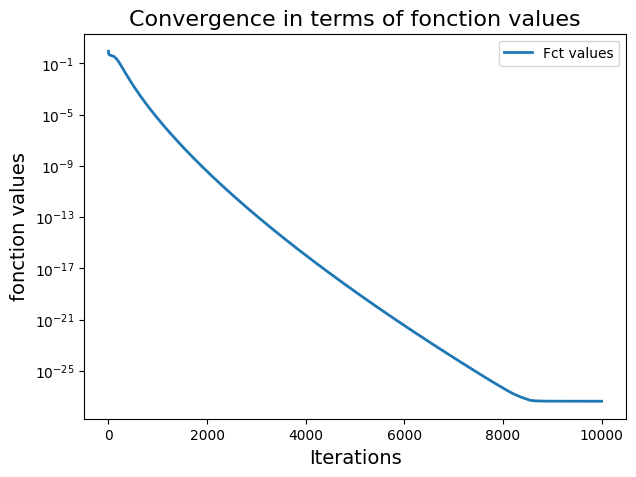

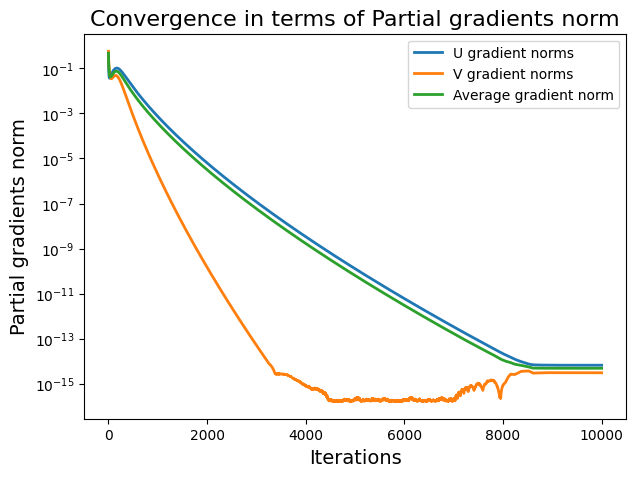

In [11]:
# Set up
np.random.seed(0)
n1 = 10
n2 = 10
r = 1

# Instantiate target
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
X = x.dot(z.T)

# Instantiate parameters
U = np.random.normal(0, 1, (n1, r))
V = np.random.normal(0, 1, (n2, r))

pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
n = pbmatfact.n

# Gradient Descent (batch_size = n)
loss_vals = sgd(
    pbmatfact, stepchoice=1 / 3, init_step=1, batch_size=n, n_iter=10000, verbose=True
)
visualize(data={"Fct values": loss_vals}, subject="fonction values")
visualize(
    data={
        "U gradient norms": pbmatfact.U_grad_norm_list,
        "V gradient norms": pbmatfact.V_grad_norm_list,
        "Average gradient norm": pbmatfact.avg_grad_norm_list,
    },
    subject="Partial gradients norm",
)

k: 0 | loss: 1.21e+00 | lr: 1.00e+00
k: 1 | loss: 1.20e+00 | lr: 8.41e-01
k: 2 | loss: 1.19e+00 | lr: 7.60e-01
k: 3 | loss: 1.14e+00 | lr: 7.07e-01
k: 4 | loss: 1.13e+00 | lr: 6.69e-01
k: 5 | loss: 1.12e+00 | lr: 6.39e-01
k: 6 | loss: 1.07e+00 | lr: 6.15e-01
k: 7 | loss: 1.04e+00 | lr: 5.95e-01
k: 8 | loss: 1.02e+00 | lr: 5.77e-01
k: 9 | loss: 1.00e+00 | lr: 5.62e-01
k: 10 | loss: 9.91e-01 | lr: 5.49e-01
k: 11 | loss: 9.88e-01 | lr: 5.37e-01
k: 12 | loss: 9.81e-01 | lr: 5.27e-01
k: 13 | loss: 9.73e-01 | lr: 5.17e-01
k: 14 | loss: 9.60e-01 | lr: 5.08e-01
k: 15 | loss: 9.46e-01 | lr: 5.00e-01
k: 16 | loss: 9.19e-01 | lr: 4.92e-01
k: 17 | loss: 9.07e-01 | lr: 4.85e-01
k: 18 | loss: 8.51e-01 | lr: 4.79e-01
k: 19 | loss: 8.39e-01 | lr: 4.73e-01
k: 20 | loss: 7.91e-01 | lr: 4.67e-01
k: 21 | loss: 7.78e-01 | lr: 4.62e-01
k: 22 | loss: 7.64e-01 | lr: 4.57e-01
k: 23 | loss: 7.61e-01 | lr: 4.52e-01
k: 24 | loss: 7.31e-01 | lr: 4.47e-01
k: 25 | loss: 7.14e-01 | lr: 4.43e-01
k: 26 | loss: 6.90e-01

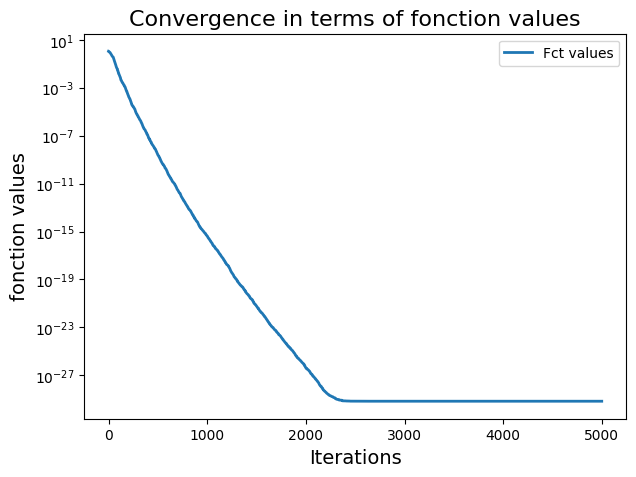

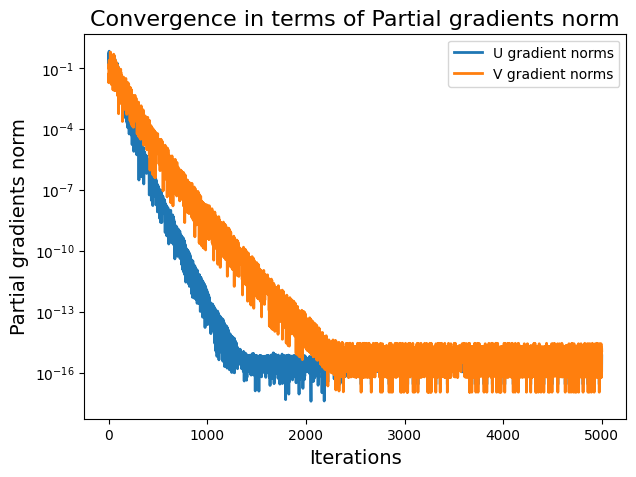

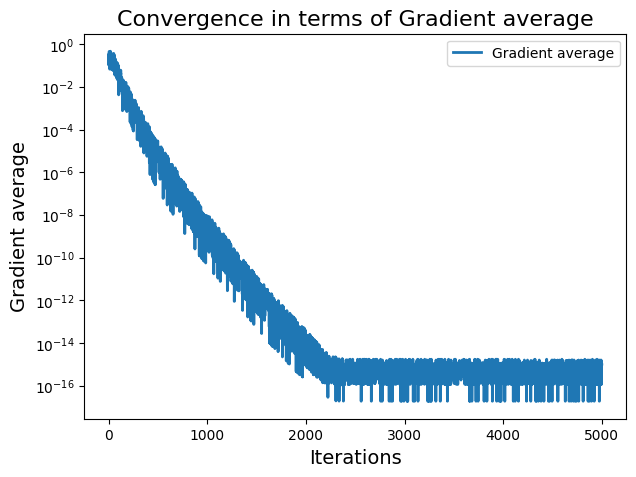

In [ ]:
# Set up
np.random.seed(0)
n1 = 10
n2 = 20
r = 1

# Instantiate target
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
X = x.dot(z.T)

# Instantiate parameters
U = np.random.normal(0, 1, (n1, r))
V = np.random.normal(0, 1, (n2, r))

pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)
n = pbmatfact.n

# Gradient Descent (batch_size = n)
loss_vals = sgd(
    pbmatfact,
    stepchoice=0.25,
    init_step=1,
    batch_size=int(0.25 * n),
    n_iter=5000,
    verbose=True,
)
visualize(data={"Fct values": loss_vals}, subject="fonction values")
visualize(
    data={
        "U gradient norms": pbmatfact.U_grad_norm_list,
        "V gradient norms": pbmatfact.V_grad_norm_list,
    },
    subject="Partial gradients norm",
)
visualize(
    data={
        "Gradient average": pbmatfact.avg_grad_norm_list,
    },
    subject="Gradient average",
)

       0 | 1.27e+00 | 1.00e+00
       1 | 1.01e+00 | 7.07e-01
       2 | 8.85e-01 | 5.77e-01
       3 | 8.09e-01 | 5.00e-01
       4 | 7.57e-01 | 4.47e-01
       5 | 7.19e-01 | 4.08e-01
       6 | 6.90e-01 | 3.78e-01
       7 | 6.67e-01 | 3.54e-01
       8 | 6.48e-01 | 3.33e-01
       9 | 6.32e-01 | 3.16e-01
      10 | 6.19e-01 | 3.02e-01
      11 | 6.08e-01 | 2.89e-01
      12 | 5.98e-01 | 2.77e-01
      13 | 5.89e-01 | 2.67e-01
      14 | 5.81e-01 | 2.58e-01
      15 | 5.74e-01 | 2.50e-01
      16 | 5.68e-01 | 2.43e-01
      17 | 5.62e-01 | 2.36e-01
      18 | 5.57e-01 | 2.29e-01
      19 | 5.52e-01 | 2.24e-01
      20 | 5.47e-01 | 2.18e-01
      21 | 5.43e-01 | 2.13e-01
      22 | 5.40e-01 | 2.09e-01
      23 | 5.36e-01 | 2.04e-01
      24 | 5.33e-01 | 2.00e-01
      25 | 5.30e-01 | 1.96e-01
      26 | 5.27e-01 | 1.92e-01
      27 | 5.24e-01 | 1.89e-01
      28 | 5.21e-01 | 1.86e-01
      29 | 5.19e-01 | 1.83e-01
      30 | 5.17e-01 | 1.80e-01
      31 | 5.14e-01 | 1.77e-01
      32

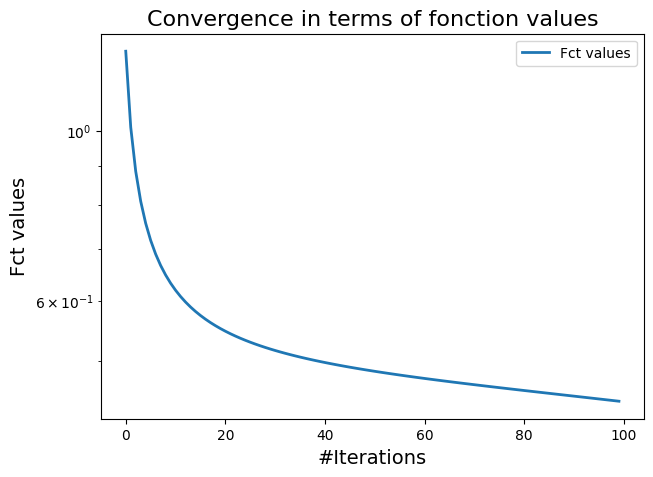

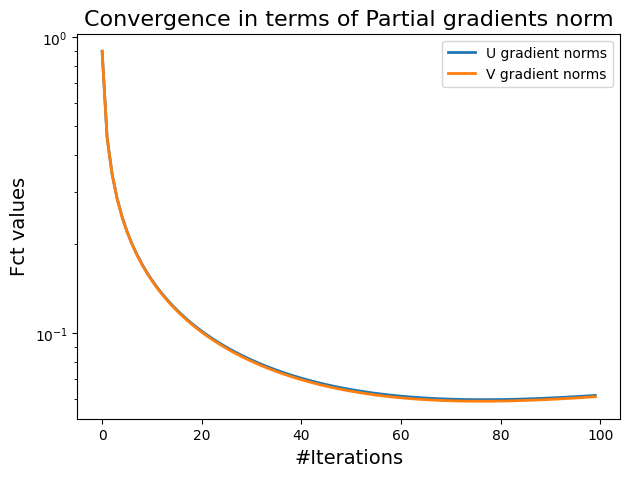

In [6]:
# Set up
np.random.seed(0)
n1 = 10
n2 = 10
r = 1

# Instantiate target
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
X = x.dot(z.T)

# Instantiate parameters
U = np.random.normal(0, 1, (n1, r))
V = np.random.normal(0, 1, (n2, r))

pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)

loss_vals = gd(pbmatfact, stepchoice=1 / 2, init_step=1, n_iter=100, verbose=True)
visualize(data={"Fct values": loss_vals}, title="fonction values")
visualize(
    data={
        "U gradient norms": pbmatfact.U_grad_norm_list,
        "V gradient norms": pbmatfact.V_grad_norm_list,
    },
    title="Partial gradients norm",
)